In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('dim_customer.json', 'r') as f:
    customer_data = json.load(f)
df_customer = pd.DataFrame(customer_data)
df_invoice = pd.read_csv('fct_invoice.csv')

df_invoice['invoice_date'] = pd.to_datetime(df_invoice['invoice_date'], format='%d/%m/%Y')
df_invoice['total_price'] = df_invoice['quantity'] * df_invoice['price']

In [24]:
#EASY
#1. How many unique customers are in the dataset?
unique_id_count = df_customer['id'].nunique()
print("Number of unique IDs:", unique_id_count)

Number of unique IDs: 5191


In [25]:
#2. What are the different categories of products available? How many unique categories are there?
unique_cat = df_invoice['category'].unique()
unique_cat_count = len(unique_cat)
print("Number of unique categories:", unique_cat_count)
print("Unique categories:", unique_cat)

Number of unique categories: 8
Unique categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


In [26]:
#3. Which payment method is the most popular? How many times was it used?
payment_method_counts = df_invoice['payment_method'].value_counts()
most_popular_payment_method = payment_method_counts.idxmax()
times_used = payment_method_counts.max()
print("Most popular payment method:", most_popular_payment_method, "was used", times_used, "times")

Most popular payment method: Cash was used 44447 times


In [27]:
#MEDIUM
#1. What are the three most popular categories, by total sales?
category_sum = df_invoice.groupby('category')['total_price'].sum()
top_three_categories = category_sum.nlargest(3).reset_index()
top_three_categories.columns = ['Category', 'Total Price']
print("Top Three Categories by Total Sales:")
print(top_three_categories.to_string(index=False))

Top Three Categories by Total Sales:
  Category  Total Price
  Clothing 113996791.04
     Shoes  66553451.47
Technology  57862350.00


In [28]:
#2. What are the total sales attributed to customers over the age of 45?
customers_45_up = df_customer[df_customer['age'] > 45]
total_sales_45_up = df_invoice[df_invoice['customer_id'].isin(customers_45_up['id'])]['total_price'].sum()
print("Total sales from customers aged over 45:", total_sales_45_up)

Total sales from customers aged over 45: 82039768.15


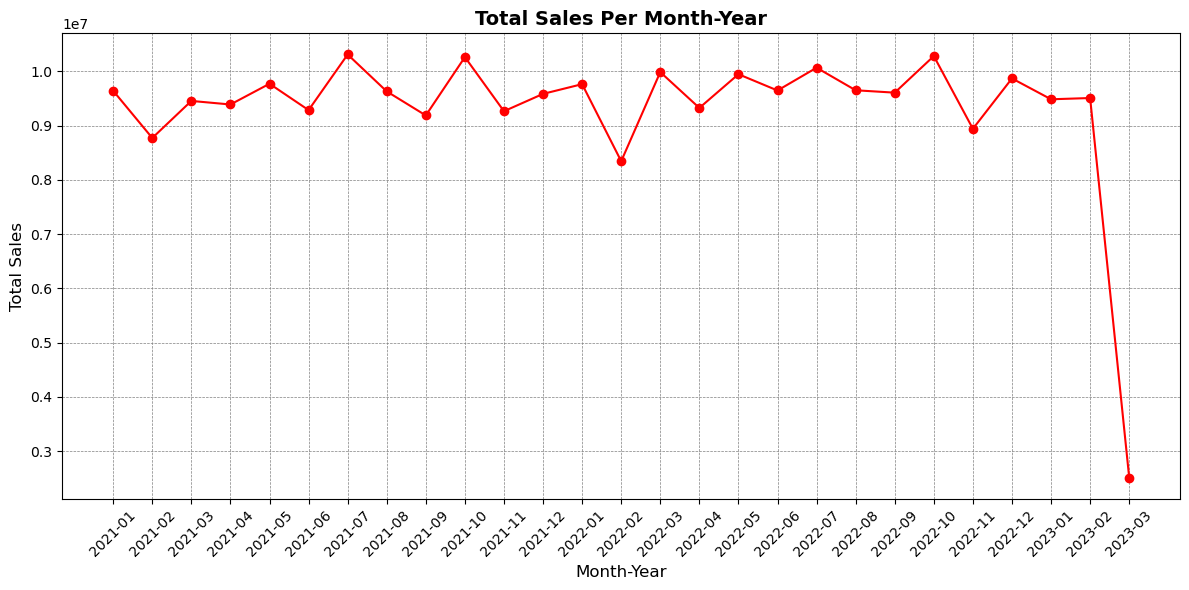

In [29]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
df_monthly_sales = df_invoice.groupby(df_invoice['invoice_date'].dt.to_period('M'))['total_price'].sum()
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales.index.astype(str), df_monthly_sales, marker='o', linestyle='-', color='r')
plt.xlabel('Month-Year', fontsize=12, fontweight='normal', color='black')
plt.ylabel('Total Sales', fontsize=12, fontweight='normal', color='black')
plt.title('Total Sales Per Month-Year', fontsize=14, fontweight='bold', color='black')
plt.xticks(rotation=45, fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.tight_layout()
plt.show()

In [30]:
#Hard
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
bins = range(10, 91, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]
df_customer['age_range'] = pd.cut(df_customer['age'], bins=bins, labels=labels, right=False)
df_merged = df_invoice.merge(df_customer, left_on='customer_id', right_on='id')
pivot_table = pd.pivot_table(
    df_merged,
    values='total_price',  # Values to aggregate
    index='age_range',     # Rows (index)
    columns='category',    # Columns
    aggfunc='sum'          # Aggregation function
)
pivot_table

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
age_range,,,,,,,,
10-19,12801.75,1927413.84,109619.36,13582.31,993281.35,12375.15,1129800.0,60426.24
20-29,79461.75,10250732.80,605915.32,73491.96,5924878.24,54943.32,5261550.0,385100.80
30-39,84143.10,11354126.96,723544.70,87246.86,7200839.66,64092.72,6159300.0,420582.40
40-49,87203.40,11215189.92,665034.96,89553.29,7025590.02,66391.80,5954550.0,390906.88
50-59,74962.20,10321851.76,587780.96,72425.04,5852857.84,54943.32,4435200.0,345067.52
60-69,80476.80,10660642.08,649990.76,80976.09,5978893.54,55025.43,5471550.0,363955.20
70-79,54827.85,7769371.28,419082.62,55050.98,4480269.05,38673.81,3638250.0,273244.16
80-89,26664.00,4493698.00,254531.60,31332.93,2628744.60,23718.06,1946700.0,153932.80
